## Merve TUTAR 1901022050

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fftshift

In [2]:
def mypgmread(filename):
    
    with open(filename, 'rb') as f:
        
        # Dosyanƒ±n ilk iki baytƒ±nƒ±nƒ±n "P5" olup olmadƒ±ƒüƒ±nƒ± kontrol et
        magic_number = f.readline().decode('ascii').strip()
        assert magic_number == 'P5', 'Invalid PGM'

        
        while True:
            #Dosyadan bir satƒ±r oku, ASCII karakterlere √ßevir, ba≈üƒ±ndaki ve sonundaki bo≈üluklarƒ± temizle
            line = f.readline().decode('ascii').strip()
            if not line.startswith('#'):# Yorum satƒ±rlarƒ±nƒ± atla
                break

        # Geni≈ülik, y√ºkseklik ve maksimum deƒüeri oku
        
        width, height = map(int, line.split()) #line adƒ±ndaki stringi bo≈üluk karakterlerine g√∂re ayƒ±rƒ±r bu ayrƒ±lmƒ±≈ü liste √ºzerinde int fonksiyonunu her bir elemana uygula
        maxval = int(f.readline().decode('ascii').strip())

        image_data = []#G√∂r√ºnt√º verisini depolamak i√ßin liste olu≈ütur
        
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = ord(f.read(1))#Dosyadan bir bayt oku ve ASCII deƒüere d√∂n√º≈üt√ºr
                row.append(pixel_value)
            image_data.append(row)

        return image_data, width, height, maxval

## Figure 4.24

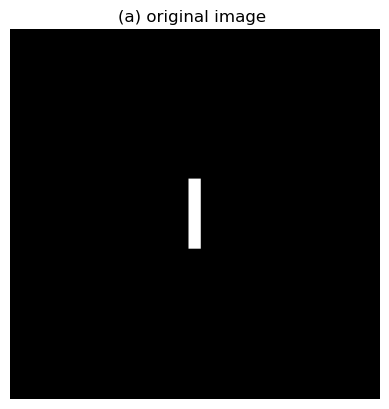

In [12]:
image_data, width, height, maxval = mypgmread('Fig0424(a)(rectangle).pgm')
plt.title("(a) original image ")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()


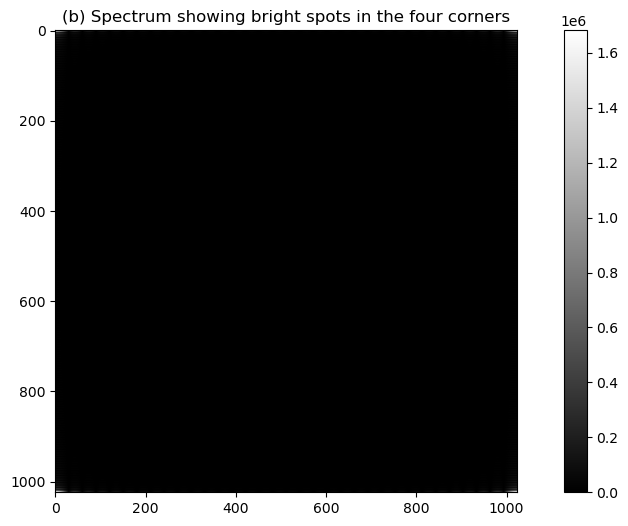

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def my2Dfft(image_data):
    # Satƒ±rlara tek boyutlu Fourier d√∂n√º≈ü√ºm√º uygula
    rows = np.fft.fft(image_data, axis=1)
    
    # S√ºtunlara tek boyutlu Fourier d√∂n√º≈ü√ºm√º uygula
    columns = np.fft.fft(rows, axis=0)
    
    return columns

image_data, width, height, maxval = mypgmread('Fig0424(a)(rectangle).pgm')

# 2D FFT al
fft_image_data = my2Dfft(image_data)

# 2D Fourier d√∂n√º≈ü√ºm sonu√ßlarƒ±nƒ± g√∂rselle≈ütir
plt.figure(figsize=(12,6))
plt.imshow(np.abs(fft_image_data), cmap='gray')# 2D Fourier d√∂n√º≈ü√ºm sonucu 
plt.title("(b) Spectrum showing bright spots in the four corners")
plt.colorbar()
plt.show()


    Figure 4.24(b)'de spektrumun d√∂rt k√∂≈üesinin de benzer ≈üekilde aydƒ±nlƒ±k olduƒüu g√∂r√ºlmektedir. F(0,0) d√∂n√º≈ü√ºm√ºn D.C. noktasƒ±nƒ± temsil eder. G√∂r√ºnt√ºn√ºn D.C. noktasƒ± sol √ºsttedir. Bu noktanƒ±n etrafƒ±ndaki deƒüerler en y√ºksek deƒüerleri alƒ±r bu sebeple aydƒ±nlƒ±ktƒ±r.

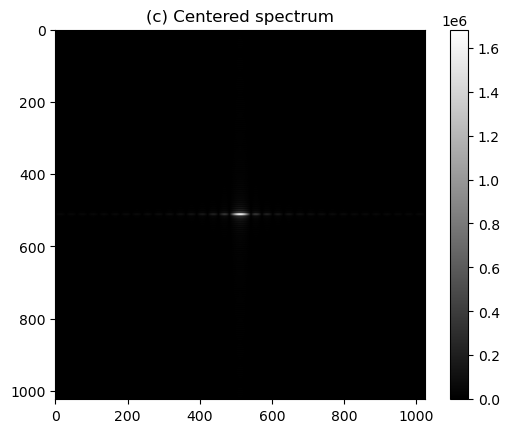

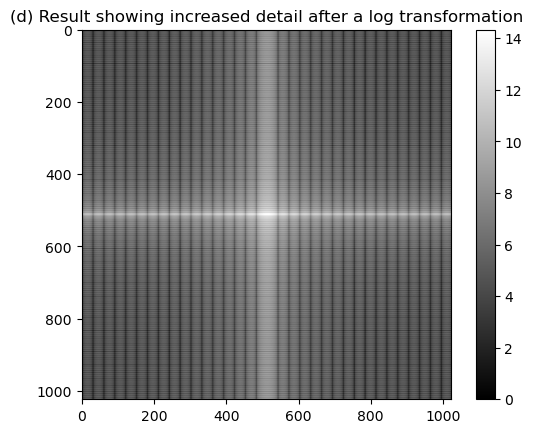

In [17]:
# (c) 
# DC noktasƒ±nƒ± kaydƒ±rmak i√ßin (M/2, N/2) noktasƒ±na -1^(x+y) ile √ßarpƒ±lan g√∂r√ºnt√ºy√º kullan
centered = image_data * (-1) ** (np.arange(height)[:, None] + np.arange(width)[None, :])
fft__centered = my2Dfft(centered)

# G√∂r√ºnt√ºleri g√∂rselle≈ütir
plt.figure()
plt.imshow(np.abs(fft__centered), cmap='gray')
plt.title("(c) Centered spectrum")
plt.colorbar()

plt.figure()
plt.imshow(np.log(1 + np.abs(fft__centered)), cmap='gray')
plt.title("(d) Result showing increased detail after a log transformation")
plt.colorbar()

plt.show()



Spektrumun D.C. noktasƒ±nƒ± merkeze kaydƒ±rmak i√ßin g√∂r√ºn√ºt√ºy√º (‚àí1)^(ùë•+ùë¶) ile √ßarptƒ±ktan sonra Fourier d√∂n√º≈ü√ºm√º alƒ±nmƒ±≈ütƒ±r. Bu g√∂r√ºnt√º (c) ≈üƒ±kkƒ±nda elde edilmi≈ü g√∂r√ºnt√ºd√ºr. ƒ∞≈ülem sonucu merkezin daha aydƒ±nlƒ±k olduƒüu g√∂r√ºlmektedir. Figure 4.24(d)  (1 + log F(u,v) ) ifadesini g√∂sterir. G√∂r√ºnt√ºde detaylar belirgindir.

In [15]:
def my2Difft(data):
    image_data, width, height, maxval = mypgmread(data)
    image_data=np.array(image_data,dtype=np.uint8)
    fft_f= my2Dfft(image_data)
    
    f_conjugate = my2Dfft(np.conj(fft_f)) / (height*width)
    f = np.conj(f_conjugate)
    
    plt.figure()
    plt.imshow(np.abs(f),cmap='gray')
    plt.colorbar()

Text(0.5, 1.0, 'Inverse FFT of the spectrum')

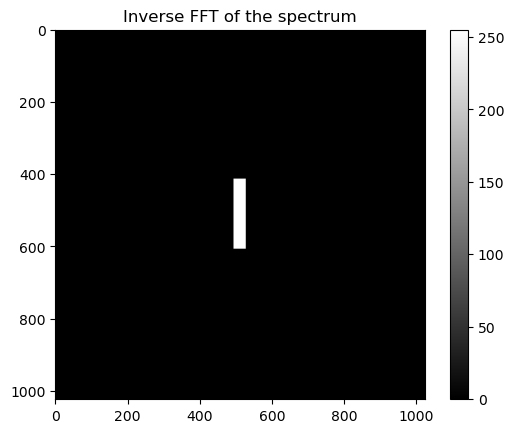

In [16]:
# Inverse FFT
my2Difft('Fig0424(a)(rectangle).pgm')
plt.title('Inverse FFT of the spectrum')

(a) ≈üƒ±kkƒ±nda kendi yazdƒ±ƒüƒ±mƒ±z my2Dfft() fonksiyonunu kullanarak ters Fourier fonksiyonunu olu≈üturup, uygulayƒ±p orjinal (a) g√∂r√ºnt√ºs√º tekrar elde edilmi≈ütir.